In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
(x_data, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_data = x_data.reshape(x_data.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_data = tf.cast(x_data, tf.float32) / 255.
x_test = tf.cast(x_test, tf.float32) / 255.


In [3]:
input_size = 784
hidden_size = 32
output_size = 784

noise_fact = 0.5

In [4]:
x_train_noise = x_data + noise_fact * np.random.normal(size=x_data.shape)
x_test_noise = x_test + noise_fact * np.random.normal(size=x_test.shape)


In [5]:
# 增加噪声后，需要将数据再控制到0-1范围
x_train_noise = np.clip(x_train_noise, a_min=0., a_max=1.)
x_test_noise = np.clip(x_test_noise, a_min=0., a_max=1.)


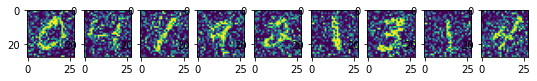

In [6]:
n = 10

plt.figure(figsize=(n, 2)) # 画布大小 10列2行（w：10，h:2）

for i in range(1, n):
    ax = plt.subplot(1, n, i)    # 在1行10列的区域 依次在第几列绘制
    plt.imshow(x_train_noise[i].reshape(28, 28))

In [7]:
# 构建encode
input_layer = tf.keras.layers.Input(shape=(input_size,))
en = tf.keras.layers.Dense(hidden_size, activation="relu")
en = en(input_layer)


In [8]:
# 构建decode
de = tf.keras.layers.Dense(output_size, activation="sigmoid")
de = de(en)


In [9]:
# 创建模型
model = tf.keras.Model(inputs=input_layer, outputs=de)
model.compile(
    optimizer="adam",
    loss="mse"
)


In [10]:
# 模型权重保存与加载
checkpoint_save_path = "./model2.ckpt"

if os.path.exists(checkpoint_save_path + ".index"):
    print('____________load the model2_____________')
    model.load_weights(checkpoint_save_path)
else:
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_save_path,
        save_best_only=True,
        save_weights_only=True
    )
    # 训练模型
    model.fit(
        x_train_noise,
        x_data,
        batch_size=128,
        epochs=50,
        shuffle=True,
        validation_data=(x_test_noise, x_test),
        callbacks=[cp_callback]
    )
    model.summary()
    

____________load the model2_____________


In [11]:
# 测试训练好的模型
# 创建新的模型encode输入
encode_model = tf.keras.Model(inputs=input_layer, outputs=en)
encode_test = encode_model(x_test_noise)

In [12]:
# 使用训练好的模型decode
input_layer_de = tf.keras.layers.Input(shape=(hidden_size, ))
output_layer_de = model.layers[-1]

decoder = tf.keras.Model(inputs=input_layer_de, outputs=output_layer_de(input_layer_de))

# 解码
decode_test = decoder.predict(encode_test)


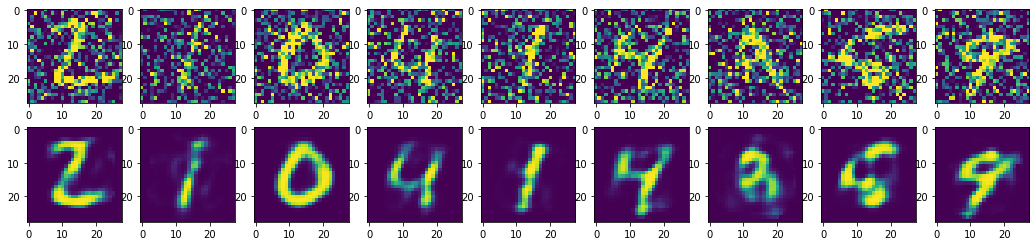

In [13]:

plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decode_test[i].reshape(28, 28))
